In [1]:
# Common imports
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
from tensorflow import set_random_seed

from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

Using TensorFlow backend.


#load data

In [2]:
data_dir = 'IMS/4th_test/txt'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']

2004.03.31.17.41.57
2004.04.05.17.11.57
2004.04.10.05.21.57
2004.03.24.00.01.57
2004.03.24.08.21.57
2004.04.15.19.22.55
2004.04.12.19.51.57
2004.04.04.23.11.57
2004.03.16.03.55.20
2004.04.08.05.11.57
2004.03.09.13.02.46
2004.03.12.03.12.46
2004.04.15.13.42.55
2004.03.18.22.25.20
2004.03.17.05.55.20
2004.03.16.11.55.20
2004.04.13.03.41.57
2004.04.12.07.11.57
2004.04.07.20.51.57
2004.04.03.20.41.57
2004.03.25.08.31.57
2004.03.18.11.05.20
2004.03.22.21.21.57
2004.03.08.12.52.46
2004.03.11.17.52.46
2004.04.02.17.21.57
2004.03.24.04.41.57
2004.04.04.04.11.57
2004.04.12.23.51.57
2004.04.10.07.31.57
2004.04.10.10.21.57
2004.03.28.20.51.57
2004.03.27.22.01.57
2004.03.14.15.32.46
2004.03.12.17.42.46
2004.03.26.10.21.57
2004.04.02.04.01.57
2004.04.08.15.41.57
2004.03.22.01.11.57
2004.04.16.19.02.55
2004.03.29.10.41.57
2004.03.11.17.32.46
2004.04.02.10.41.57
2004.04.01.17.51.57
2004.04.01.21.01.57
2004.03.15.02.22.46
2004.04.16.18.42.55
2004.03.06.14.52.46
2004.03.30.22.21.57
2004.04.02.06.31.57


2004.03.30.08.31.57
2004.04.12.08.11.57
2004.03.24.13.31.57
2004.03.13.15.12.46
2004.03.14.01.12.46
2004.03.13.02.42.46
2004.03.09.06.42.46
2004.03.05.06.32.46
2004.03.10.15.32.46
2004.04.15.17.02.55
2004.04.01.13.01.57
2004.03.06.17.12.46
2004.03.09.05.32.46
2004.03.25.18.51.57
2004.03.06.11.52.46
2004.04.07.15.11.57
2004.04.02.17.11.57
2004.04.10.21.41.57
2004.03.17.16.05.20
2004.03.24.17.21.57
2004.04.04.14.51.57
2004.03.08.10.52.46
2004.04.10.20.21.57
2004.03.12.05.32.46
2004.03.08.02.52.46
2004.03.11.12.52.46
2004.03.26.04.11.57
2004.03.21.05.31.57
2004.04.01.04.51.57
2004.03.30.08.11.57
2004.03.19.19.41.57
2004.03.16.14.05.20
2004.03.27.05.51.57
2004.03.15.04.02.46
2004.03.27.13.21.57
2004.03.27.07.51.57
2004.03.23.14.31.57
2004.03.12.00.02.46
2004.03.10.02.32.46
2004.04.01.15.41.57
2004.03.08.17.02.46
2004.03.04.19.42.46
2004.04.04.05.11.57
2004.03.16.01.35.20
2004.04.06.21.01.57
2004.03.30.14.51.57
2004.03.20.16.21.57
2004.03.06.00.52.46
2004.03.11.00.02.46
2004.04.17.08.52.55


2004.04.09.11.41.57
2004.03.04.22.02.46
2004.03.25.09.21.57
2004.04.08.20.31.57
2004.03.06.10.22.46
2004.03.18.12.25.20
2004.03.24.08.31.57
2004.03.10.20.22.46
2004.03.26.07.41.57
2004.03.22.21.11.57
2004.03.18.01.25.20
2004.04.13.11.21.57
2004.03.09.06.22.46
2004.03.12.22.32.46
2004.04.03.14.01.57
2004.04.04.18.21.57
2004.03.11.15.42.46
2004.04.16.06.22.55
2004.03.11.02.32.46
2004.03.22.20.51.57
2004.03.23.19.11.57
2004.04.17.16.22.55
2004.03.30.20.01.57
2004.04.12.10.21.57
2004.04.02.16.21.57
2004.03.18.23.45.20
2004.03.27.05.01.57
2004.03.30.21.31.57
2004.04.01.16.21.57
2004.03.15.14.45.20
2004.03.30.00.21.57
2004.04.05.03.11.57
2004.03.31.21.51.57
2004.04.05.09.31.57
2004.03.14.22.22.46
2004.04.07.12.21.57
2004.04.11.02.41.57
2004.03.24.22.41.57
2004.04.01.14.11.57
2004.03.20.13.21.57
2004.03.13.14.32.46
2004.03.08.19.52.46
2004.03.08.12.02.46
2004.04.17.06.52.55
2004.03.24.01.31.57
2004.03.21.03.21.57
2004.03.16.00.25.20
2004.04.12.05.51.57
2004.04.03.06.51.57
2004.03.07.23.02.46


2004.03.22.00.51.57
2004.04.07.22.51.57
2004.03.27.14.11.57
2004.04.09.14.11.57
2004.03.28.11.51.57
2004.03.06.06.32.46
2004.03.11.04.22.46
2004.03.29.21.51.57
2004.03.26.18.31.57
2004.03.16.03.05.20
2004.03.18.11.35.20
2004.04.12.23.41.57
2004.04.09.22.11.57
2004.04.08.19.41.57
2004.03.27.20.11.57
2004.03.08.23.02.46
2004.03.20.15.01.57
2004.03.06.13.22.46
2004.04.12.20.01.57
2004.03.10.11.32.46
2004.03.24.18.51.57
2004.04.04.08.01.57
2004.04.17.18.32.55
2004.03.20.10.51.57
2004.03.28.19.21.57
2004.03.20.03.11.57
2004.04.05.04.51.57
2004.04.06.10.01.57
2004.04.10.03.31.57
2004.03.25.21.51.57
2004.03.13.10.42.46
2004.04.12.04.41.57
2004.04.13.10.41.57
2004.03.31.19.51.57
2004.03.29.10.01.57
2004.03.14.15.42.46
2004.03.14.14.52.46
2004.03.27.14.41.57
2004.04.06.03.21.57
2004.03.08.09.52.46
2004.04.13.22.11.57
2004.03.13.16.12.46
2004.04.12.19.41.57
2004.03.31.12.41.57
2004.04.07.18.41.57
2004.03.14.02.22.46
2004.04.05.18.31.57
2004.03.13.13.02.46
2004.03.10.12.12.46
2004.03.06.13.42.46


2004.03.25.17.11.57
2004.03.05.09.22.46
2004.03.24.20.41.57
2004.03.18.00.35.20
2004.04.04.04.01.57
2004.04.11.07.11.57
2004.03.31.16.41.57
2004.03.08.19.02.46
2004.03.08.23.42.46
2004.04.04.01.21.57
2004.04.08.05.41.57
2004.03.08.09.32.46
2004.03.30.22.11.57
2004.04.01.21.11.57
2004.04.15.14.02.55
2004.03.13.01.32.46
2004.04.09.14.21.57
2004.04.08.19.01.57
2004.04.11.05.41.57
2004.03.10.05.12.46
2004.04.01.22.21.57
2004.03.06.05.02.46
2004.04.15.20.22.55
2004.03.06.10.32.46
2004.04.06.20.31.57
2004.03.11.17.02.46
2004.03.23.19.41.57
2004.04.17.22.52.55
2004.03.11.04.02.46
2004.03.29.06.51.57
2004.04.11.11.01.57
2004.03.05.22.42.46
2004.03.21.03.41.57
2004.03.11.08.12.46
2004.04.13.04.31.57
2004.03.07.00.52.46
2004.04.15.18.32.55
2004.03.22.07.11.57
2004.03.18.03.45.20
2004.04.13.07.41.57
2004.03.29.15.41.57
2004.03.22.03.11.57
2004.03.22.14.31.57
2004.04.07.18.01.57
2004.04.14.17.51.57
2004.03.12.14.02.46
2004.03.09.00.52.46
2004.03.20.05.31.57
2004.03.06.00.22.46
2004.04.04.16.51.57


2004.04.13.03.21.57
2004.04.16.08.52.55
2004.04.15.17.12.55
2004.04.04.08.31.57
2004.03.05.20.42.46
2004.04.12.01.01.57
2004.03.13.14.02.46
2004.04.07.23.01.57
2004.03.30.10.11.57
2004.04.08.09.31.57
2004.03.22.17.41.57
2004.03.08.01.22.46
2004.03.23.02.21.57
2004.04.07.23.51.57
2004.03.31.07.21.57
2004.03.27.03.01.57
2004.03.11.01.12.46
2004.04.09.16.31.57
2004.04.07.08.41.57
2004.03.07.04.02.46
2004.03.05.14.12.46
2004.03.31.14.01.57
2004.04.13.02.21.57
2004.03.25.08.41.57
2004.04.11.21.31.57
2004.03.13.05.02.46
2004.03.31.14.31.57
2004.04.05.19.31.57
2004.03.19.15.51.57
2004.03.09.15.42.46
2004.03.22.08.31.57
2004.03.22.10.21.57
2004.03.28.16.31.57
2004.04.02.20.41.57
2004.03.21.07.51.57
2004.03.30.07.01.57
2004.03.26.08.21.57
2004.03.12.10.22.46
2004.03.06.17.52.46
2004.03.21.00.51.57
2004.04.12.01.31.57
2004.04.13.21.41.57
2004.04.05.09.01.57
2004.04.12.10.01.57
2004.03.17.11.35.20
2004.04.01.06.31.57
2004.03.29.21.11.57
2004.04.16.22.32.55
2004.04.04.13.01.57
2004.04.07.08.01.57


2004.03.22.06.11.57
2004.03.15.00.32.46
2004.03.25.14.51.57
2004.03.13.19.52.46
2004.04.13.20.31.57
2004.04.08.14.41.57
2004.04.01.08.31.57
2004.03.27.11.51.57
2004.03.29.20.51.57
2004.03.08.14.42.46
2004.04.07.09.51.57
2004.03.04.12.02.46
2004.04.10.03.51.57
2004.03.18.20.35.20
2004.04.02.18.21.57
2004.04.11.16.41.57
2004.03.23.21.31.57
2004.03.17.21.55.20
2004.04.16.18.12.55
2004.04.09.10.21.57
2004.03.04.11.32.46
2004.04.09.17.51.57
2004.04.01.23.41.57
2004.03.09.13.42.46
2004.03.26.08.11.57
2004.03.26.13.31.57
2004.04.17.06.02.55
2004.04.09.07.41.57
2004.03.26.05.11.57
2004.04.16.04.12.55
2004.04.11.03.01.57
2004.04.12.04.51.57
2004.03.27.05.31.57
2004.03.16.01.55.20
2004.03.29.05.51.57
2004.04.02.19.21.57
2004.03.26.22.31.57
2004.04.11.17.01.57
2004.03.06.23.52.46
2004.03.07.06.22.46
2004.03.07.05.22.46
2004.03.22.02.31.57
2004.03.30.02.31.57
2004.03.29.10.11.57
2004.03.13.19.22.46
2004.04.13.14.01.57
2004.03.23.11.41.57
2004.03.28.17.01.57
2004.04.09.02.01.57
2004.04.09.21.21.57


2004.03.19.22.01.57
2004.03.28.12.01.57
2004.04.06.15.41.57
2004.03.10.07.42.46
2004.03.10.21.22.46
2004.04.05.00.21.57
2004.03.07.17.12.46
2004.03.17.07.45.20
2004.04.08.08.41.57
2004.03.04.16.02.46
2004.03.08.14.22.46
2004.04.12.23.11.57
2004.03.28.03.21.57
2004.03.16.00.35.20
2004.03.26.17.01.57
2004.03.24.10.31.57
2004.04.13.05.51.57
2004.03.05.02.02.46
2004.03.23.01.01.57
2004.03.28.19.31.57
2004.03.09.01.02.46
2004.04.10.23.51.57
2004.03.17.04.15.20
2004.03.25.01.21.57
2004.04.03.06.21.57
2004.03.23.14.51.57
2004.03.13.18.52.46
2004.03.18.16.05.20
2004.03.24.15.51.57
2004.03.05.19.12.46
2004.03.26.10.11.57
2004.04.11.17.21.57
2004.03.13.00.32.46
2004.04.08.03.51.57
2004.04.02.17.31.57
2004.03.06.13.52.46
2004.03.15.03.22.46
2004.03.05.04.02.46
2004.04.13.08.41.57
2004.03.15.13.05.20
2004.04.14.12.01.57
2004.03.30.14.11.57
2004.03.28.08.01.57
2004.03.18.04.25.20
2004.04.02.09.31.57
2004.03.19.20.31.57
2004.04.12.16.51.57
2004.04.06.23.11.57
2004.03.11.08.32.46
2004.03.28.06.11.57


2004.03.10.16.32.46
2004.03.13.04.52.46
2004.03.06.14.12.46
2004.03.08.21.42.46
2004.03.12.12.42.46
2004.04.11.13.31.57
2004.04.06.15.51.57
2004.04.07.07.51.57
2004.03.15.13.15.20
2004.03.13.06.52.46
2004.04.08.19.11.57
2004.04.11.04.31.57
2004.04.12.10.31.57
2004.04.10.22.31.57
2004.04.02.23.51.57
2004.03.16.04.15.20
2004.03.25.11.21.57
2004.04.12.18.01.57
2004.03.07.07.22.46
2004.04.14.01.21.57
2004.03.20.05.51.57
2004.04.09.17.01.57
2004.04.01.16.51.57
2004.03.09.21.52.46
2004.04.09.20.21.57
2004.03.11.22.32.46
2004.03.14.11.52.46
2004.03.08.08.52.46
2004.03.29.13.51.57
2004.03.10.03.42.46
2004.03.11.14.02.46
2004.03.29.06.11.57
2004.03.10.01.32.46
2004.04.13.00.21.57
2004.04.13.16.41.57
2004.03.26.12.11.57
2004.03.13.12.42.46
2004.04.17.19.02.55
2004.03.23.06.21.57
2004.03.30.09.51.57
2004.04.02.08.31.57
2004.04.11.20.51.57
2004.04.10.01.21.57
2004.03.05.00.42.46
2004.03.10.03.22.46
2004.03.13.22.22.46
2004.03.16.09.05.20
2004.03.10.02.22.46
2004.03.30.00.51.57
2004.04.14.01.41.57


2004.04.15.23.32.55
2004.03.07.11.42.46
2004.04.04.09.01.57
2004.04.10.18.01.57
2004.04.05.08.31.57
2004.04.15.12.52.55
2004.04.05.07.41.57
2004.04.06.13.31.57
2004.04.09.08.01.57
2004.03.26.21.41.57
2004.03.26.06.31.57
2004.03.29.13.41.57
2004.03.06.04.32.46
2004.03.14.16.02.46
2004.04.01.01.41.57
2004.03.06.19.02.46
2004.03.23.15.01.57
2004.04.15.22.52.55
2004.04.05.14.01.57
2004.04.15.14.32.55
2004.04.10.19.31.57
2004.04.14.11.51.57
2004.03.29.04.01.57
2004.03.22.14.11.57
2004.03.10.17.32.46
2004.03.19.00.25.20
2004.03.25.02.01.57
2004.03.17.18.05.20
2004.03.08.18.12.46
2004.03.22.01.51.57
2004.04.01.08.41.57
2004.03.25.21.41.57
2004.03.21.05.21.57
2004.04.12.15.31.57
2004.03.23.13.21.57
2004.03.10.01.12.46
2004.03.11.18.22.46
2004.04.03.21.21.57
2004.04.16.05.12.55
2004.03.18.17.05.20
2004.04.11.03.31.57
2004.03.07.09.02.46
2004.03.25.11.41.57
2004.04.17.12.52.55
2004.03.22.16.41.57
2004.04.11.01.01.57
2004.03.12.06.42.46
2004.03.22.15.11.57
2004.03.08.18.02.46
2004.03.30.08.51.57


2004.04.02.10.11.57
2004.03.15.06.22.46
2004.04.17.03.32.55
2004.03.12.12.02.46
2004.03.23.12.11.57
2004.04.01.19.11.57
2004.03.13.23.52.46
2004.03.17.12.55.20
2004.03.13.21.42.46
2004.04.08.16.51.57
2004.04.09.22.51.57
2004.04.11.19.21.57
2004.04.07.22.21.57
2004.03.29.17.41.57
2004.03.29.18.41.57
2004.04.10.05.31.57
2004.04.11.05.01.57
2004.03.14.05.22.46
2004.03.19.21.31.57
2004.03.05.16.32.46
2004.03.26.12.41.57
2004.04.05.17.21.57
2004.03.18.10.45.20
2004.04.13.01.11.57
2004.04.11.16.21.57
2004.03.20.06.31.57
2004.04.13.16.01.57
2004.03.16.19.25.20
2004.03.12.09.12.46
2004.04.16.18.52.55
2004.03.26.20.01.57
2004.03.07.15.32.46
2004.03.25.03.41.57
2004.04.11.22.01.57
2004.03.06.15.12.46
2004.03.22.23.01.57
2004.04.05.03.51.57
2004.03.14.19.42.46
2004.03.06.02.32.46
2004.03.31.14.21.57
2004.04.01.12.21.57
2004.04.05.21.11.57
2004.03.27.16.51.57
2004.04.07.09.21.57
2004.03.28.21.11.57
2004.03.07.16.12.46
2004.03.10.20.42.46
2004.03.07.00.42.46
2004.04.10.00.11.57
2004.03.18.21.45.20


2004.04.11.01.31.57
2004.03.25.14.11.57
2004.04.10.00.31.57
2004.03.24.13.01.57
2004.04.09.12.01.57
2004.04.08.21.01.57
2004.03.16.11.45.20
2004.04.10.13.51.57
2004.04.01.19.51.57
2004.03.05.12.12.46
2004.04.09.20.41.57
2004.03.20.00.21.57
2004.03.12.00.22.46
2004.03.16.22.25.20
2004.04.11.20.11.57
2004.04.11.09.41.57
2004.03.24.14.51.57
2004.03.12.19.12.46
2004.04.03.03.11.57
2004.03.28.05.11.57
2004.03.24.00.51.57
2004.03.17.21.45.20
2004.03.23.04.31.57
2004.03.07.21.02.46
2004.03.10.02.52.46
2004.03.23.17.11.57
2004.03.19.21.11.57
2004.03.16.08.05.20
2004.03.06.18.02.46
2004.04.05.02.01.57
2004.03.05.03.22.46
2004.03.15.05.32.46
2004.04.03.07.11.57
2004.04.10.14.11.57
2004.03.14.11.42.46
2004.04.02.01.21.57
2004.03.30.13.01.57
2004.04.17.02.42.55
2004.04.02.10.31.57
2004.04.11.21.11.57
2004.03.14.22.42.46
2004.04.18.00.32.55
2004.03.08.14.12.46
2004.03.13.23.22.46
2004.03.29.23.31.57
2004.03.05.20.32.46
2004.04.03.10.11.57
2004.04.10.06.11.57
2004.04.01.00.41.57
2004.03.16.23.25.20


2004.03.28.02.21.57
2004.03.23.08.01.57
2004.04.13.14.31.57
2004.03.14.18.42.46
2004.03.13.14.52.46
2004.03.04.18.02.46
2004.03.21.22.11.57
2004.04.15.00.01.57
2004.04.13.05.41.57
2004.04.11.13.11.57
2004.03.12.16.52.46
2004.03.27.09.11.57
2004.03.07.23.52.46
2004.03.16.05.35.20
2004.03.24.10.21.57
2004.03.12.14.12.46
2004.04.07.07.21.57
2004.03.15.17.25.20
2004.03.18.11.15.20
2004.04.07.16.41.57
2004.04.02.00.51.57
2004.03.26.19.41.57
2004.03.24.23.51.57
2004.03.07.22.32.46
2004.03.12.13.22.46
2004.03.21.21.41.57
2004.03.14.06.12.46
2004.04.11.18.01.57
2004.03.22.16.01.57
2004.04.06.19.51.57
2004.03.16.10.45.20
2004.04.03.19.51.57
2004.04.09.12.31.57
2004.03.12.10.42.46
2004.04.07.00.11.57
2004.03.14.21.32.46
2004.04.13.17.31.57
2004.04.10.02.01.57
2004.03.07.11.52.46
2004.04.05.23.21.57
2004.04.14.19.21.57
2004.03.10.12.32.46
2004.03.08.21.52.46
2004.03.13.04.42.46
2004.04.07.12.31.57
2004.03.28.10.41.57
2004.03.08.03.32.46
2004.03.25.00.11.57
2004.03.31.04.41.57
2004.03.25.13.11.57


2004.03.16.03.45.20
2004.04.14.14.51.57
2004.03.30.01.11.57
2004.04.04.13.21.57
2004.04.16.16.42.55
2004.04.13.23.31.57
2004.03.25.01.01.57
2004.03.28.05.01.57
2004.03.20.12.41.57
2004.04.02.20.01.57
2004.03.10.07.52.46
2004.03.21.04.01.57
2004.03.29.13.01.57
2004.03.14.18.32.46
2004.04.01.02.51.57
2004.03.31.19.31.57
2004.03.12.07.12.46
2004.04.12.00.21.57
2004.03.15.16.55.20
2004.03.16.22.15.20
2004.04.04.00.01.57
2004.03.17.21.25.20
2004.03.25.19.11.57
2004.03.18.22.05.20
2004.03.26.21.01.57
2004.03.10.05.42.46
2004.04.07.10.31.57
2004.04.13.00.31.57
2004.03.12.05.22.46
2004.04.17.23.42.55
2004.03.29.12.51.57
2004.03.13.11.52.46
2004.04.06.08.11.57
2004.04.14.13.51.57
2004.03.09.10.32.46
2004.04.14.09.31.57
2004.03.09.13.12.46
2004.04.14.21.21.57
2004.03.10.04.42.46
2004.03.31.09.21.57
2004.03.06.01.12.46
2004.03.25.15.41.57
2004.04.04.20.41.57
2004.03.30.21.51.57
2004.04.06.05.11.57
2004.03.11.14.12.46
2004.03.11.13.52.46
2004.04.07.16.31.57
2004.04.09.09.11.57
2004.04.13.11.31.57


2004.04.02.18.01.57
2004.03.07.17.52.46
2004.04.16.20.12.55
2004.04.16.09.52.55
2004.03.04.23.02.46
2004.03.23.02.51.57
2004.04.17.05.12.55
2004.03.28.17.41.57
2004.04.12.12.11.57
2004.03.07.18.22.46
2004.03.16.06.25.20
2004.03.29.22.41.57
2004.03.05.23.02.46
2004.04.12.01.21.57
2004.04.04.13.41.57
2004.04.02.14.01.57
2004.03.15.03.32.46
2004.03.31.21.11.57
2004.03.23.19.51.57
2004.03.21.23.11.57
2004.03.18.09.25.20
2004.04.11.23.21.57
2004.04.01.07.11.57
2004.03.19.01.05.20
2004.04.04.10.21.57
2004.04.04.12.41.57
2004.03.08.21.22.46
2004.04.02.09.11.57
2004.04.08.15.51.57
2004.03.19.02.05.20
2004.03.15.07.32.46
2004.04.12.18.41.57
2004.03.21.02.21.57
2004.03.20.06.21.57
2004.03.13.01.02.46
2004.04.16.12.52.55
2004.04.12.14.41.57
2004.04.03.13.21.57
2004.03.07.09.12.46
2004.03.05.19.32.46
2004.03.19.15.31.57
2004.04.05.00.11.57
2004.03.05.17.32.46
2004.04.13.18.21.57
2004.03.30.19.21.57
2004.04.05.23.31.57
2004.03.11.13.42.46
2004.04.17.21.02.55
2004.03.16.20.55.20
2004.03.12.17.52.46


2004.03.23.16.01.57
2004.03.23.02.31.57
2004.03.17.03.15.20
2004.03.24.22.21.57
2004.03.23.07.51.57
2004.03.22.11.31.57
2004.03.08.10.02.46
2004.03.20.12.01.57
2004.04.09.12.11.57
2004.03.07.23.42.46
2004.04.01.22.11.57
2004.03.27.11.01.57
2004.03.07.02.42.46
2004.04.07.01.51.57
2004.03.22.13.11.57
2004.03.07.10.22.46
2004.03.27.04.41.57
2004.03.25.07.21.57
2004.03.22.12.01.57
2004.03.21.15.01.57
2004.03.27.21.31.57
2004.04.07.14.01.57
2004.03.14.12.02.46
2004.03.12.10.32.46
2004.04.10.05.51.57
2004.04.01.16.31.57
2004.03.26.12.31.57
2004.04.07.04.01.57
2004.03.29.14.11.57
2004.03.30.02.11.57
2004.04.06.18.21.57
2004.04.09.04.41.57
2004.04.11.10.21.57
2004.04.08.03.11.57
2004.04.09.05.31.57
2004.03.18.14.25.20
2004.04.07.02.41.57
2004.04.04.15.21.57
2004.03.21.03.31.57
2004.03.12.23.32.46
2004.03.19.13.11.57
2004.03.26.05.51.57
2004.03.25.16.31.57
2004.03.15.19.15.20
2004.03.14.17.02.46
2004.04.17.02.52.55
2004.04.05.05.01.57
2004.03.18.01.05.20
2004.04.12.19.31.57
2004.04.17.01.42.55


In [4]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('IMS/merged_dataset_BearingTest_3.csv')
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-03-04 09:27:46,0.061630,0.075278,0.051991,0.043475
2004-03-04 09:32:46,0.060774,0.072206,0.052239,0.042039
2004-03-04 09:42:46,0.062195,0.072886,0.054809,0.041360
2004-03-04 09:52:46,0.062994,0.073433,0.054261,0.043126
2004-03-04 10:02:46,0.061945,0.073006,0.053237,0.042617


#splitting the dataset

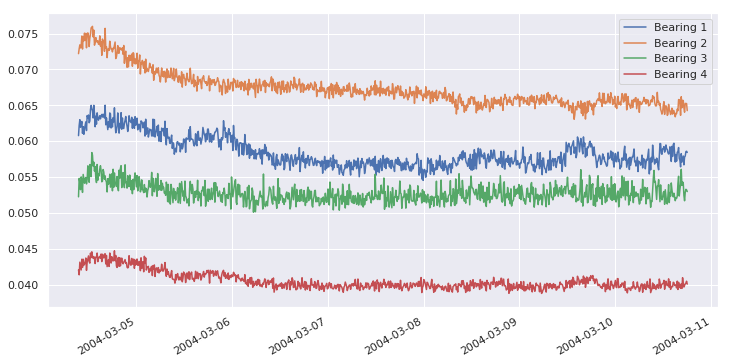

In [5]:
dataset_train = merged_data['2004-03-04 09:32:46':'2004-03-10 18:05:20']
dataset_test = merged_data['2004-03-10 18:05:20':]
dataset_train.plot(figsize = (12,6))

#minmax scaler to preserve the shape of original distribution and transform the data

In [6]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [8]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

In [9]:
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

In [10]:
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 4. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [11]:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 4. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

In [12]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [13]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

In [14]:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

In [15]:
mean_distr = data_train.mean(axis=0)

In [16]:
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)

(0.0, 15)

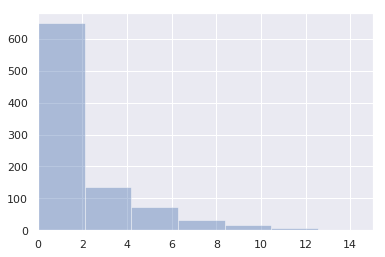

In [17]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

/home/supradha/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Mahalanobis dist')

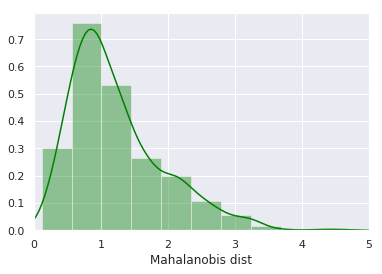

In [18]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [19]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
2004-03-10 18:12:46,0.390568,4.9212,False
2004-03-10 18:22:46,0.854757,4.9212,False
2004-03-10 18:32:46,0.779530,4.9212,False
2004-03-10 18:42:46,0.910122,4.9212,False
2004-03-10 18:52:46,1.403127,4.9212,False


In [ ]:
anomaly_alldata = pd.concat([anomaly])
anomaly_alldata.to_csv('/home/supradha/Downloads/IMS (1)/Anomaly_distance3_3.csv')

In [ ]:
#verifying PCA model in test data
anomaly_alldata.plot(figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])